In [74]:
import pandas as pd
from string import punctuation
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import tokenization
import copy
import json
from wordcloud import WordCloud
pd.options.display.max_colwidth = 100

In [5]:
df = pd.read_csv('./data/new/new_all_nl.tsv', sep='\t', header=None, names=['labels','text'])

In [6]:
df.sample(5)

,labels,text
6773,239,and since the pain started has it gotten worse or remained the same?
4941,200,Do you have high blood pressure?
5359,7,any over the counter medicaions?
6154,308,What dosage?
1583,325,where would you say the pain is


In [7]:
def decapitalize(string_):
    return string_.lower()

In [8]:
df['text'] = df['text'].apply(decapitalize)

In [9]:
df.sample(5)

,labels,text
3937,306,what makes the pain hurt the most
3538,196,how has this all made you feel
380,271,alright thank you mr. wilkins
2459,271,"i hope so, thank you for working with me today mr. wilkins."
4097,125,do you have any siblings


In [10]:
def remove_punctuations(string_):
    return ''.join(c for c in string_ if c not in punctuation)

In [11]:
df['text'] = df['text'].apply(remove_punctuations)

In [12]:
df.sample(5)

,labels,text
6273,305,does anything relieve the pain
5115,277,you said you would characterize this pain as dull is that correct
3541,30,are you currently in a relationship
6641,163,have you had a prostate exam
2694,228,okay yeah i see how that could effect your job so now im going to ask a couple questions about y...


In [13]:
def split_words(string_):
    return string_.split(' ')

In [14]:
df['split'] = df['text'].apply(split_words)

In [15]:
df.sample(5)

,labels,text,split
1839,312,so this started before your back pain began,"[so, this, started, before, your, back, pain, began]"
2134,291,what do you like to do for fun,"[what, do, you, like, to, do, for, fun]"
4797,47,are you taking any vitamins,"[are, you, taking, any, vitamins]"
3714,40,do you do anything for stress relief,"[do, you, do, anything, for, stress, relief]"
1453,28,how is your emotional health,"[how, is, your, emotional, health]"


In [16]:
num_class = len(set(df['labels'].data))
num_class

C:\Users\rolo_\venv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Series.data is deprecated and will be removed in a future version
  


334

In [27]:
def horizontal_line(y):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()
    l = mlines.Line2D([xmin,340],[y,y],color='r')
    ax.add_line(l)
    return l
def ranked_class_density(labels):
    num_class = len(set(labels.data))
    class_count = [0]*num_class
    for i in labels.data:
        class_count[i] +=1
    class_count_ = []
    for i in range(num_class):
        class_count_.append((i, class_count[i]))
    class_count_.sort(key=lambda x:x[1], reverse=True)
    classes = [i[0] for i in class_count_]
    counts = [i[1] for i in class_count_]
    median = np.median(counts)

    minority_classes = [i[0] for i in class_count_ if i[1]< median]
    print('median'+str(np.median(counts)))

    print(len(minority_classes))
    horizontal_line(median)
    plt.plot(counts)
    plt.show()
    return (median, minority_classes)

median7.0
166


C:\Users\rolo_\venv\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Series.data is deprecated and will be removed in a future version
  if __name__ == '__main__':
C:\Users\rolo_\venv\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Series.data is deprecated and will be removed in a future version
  # This is added back by InteractiveShellApp.init_path()


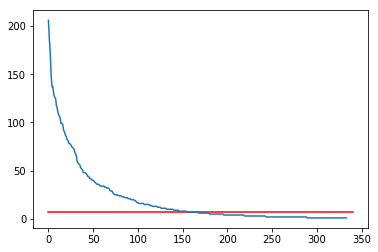

(7.0,
 [37,
  41,
  64,
  72,
  92,
  116,
  164,
  176,
  177,
  297,
  315,
  329,
  0,
  5,
  24,
  90,
  102,
  110,
  120,
  168,
  175,
  188,
  193,
  195,
  222,
  248,
  287,
  309,
  3,
  21,
  27,
  46,
  62,
  96,
  108,
  119,
  145,
  160,
  163,
  203,
  220,
  227,
  231,
  253,
  256,
  258,
  259,
  295,
  303,
  323,
  328,
  11,
  17,
  20,
  61,
  114,
  118,
  149,
  167,
  169,
  170,
  180,
  191,
  212,
  223,
  254,
  257,
  262,
  269,
  274,
  300,
  310,
  314,
  320,
  333,
  1,
  6,
  8,
  13,
  16,
  18,
  32,
  38,
  48,
  58,
  69,
  77,
  83,
  89,
  94,
  109,
  111,
  121,
  129,
  140,
  150,
  153,
  154,
  155,
  159,
  162,
  166,
  183,
  186,
  201,
  207,
  230,
  232,
  235,
  240,
  246,
  265,
  267,
  284,
  304,
  311,
  318,
  321,
  322,
  327,
  331,
  2,
  9,
  15,
  19,
  26,
  42,
  50,
  54,
  60,
  63,
  66,
  68,
  71,
  75,
  76,
  88,
  115,
  124,
  127,
  130,
  132,
  139,
  144,
  146,
  147,
  171,
  189,
  202,
  209,
  

In [28]:
ranked_class_density(df['labels'])

In [31]:
# bert tokenizer
bert_tokenizor = tokenization.FullTokenizer('./data/bert_embeddings/vocab.txt')

In [51]:
text_series = copy.deepcopy(df['text'])
text_series = text_series.apply(bert_tokenizor.tokenize)
df['bert_token'] = text_series

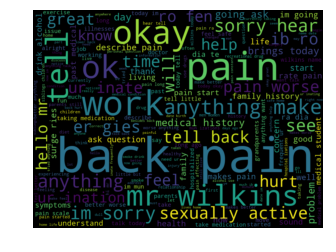

In [53]:
list_of_sentences = text_series.to_list()
allcorpus = ''
list_token = []
for sentence in list_of_sentences:
    for word in sentence:
        allcorpus += word+' '
        list_token.append(word)
wc = WordCloud(width=1024, height=768, margin=0).generate(allcorpus)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

In [57]:
print(len(list_token))
print(len(set(list_token)))

57495
2259


In [58]:
set(list_token)

{'loss',
 'sensation',
 'ever',
 'hear',
 '##gn',
 'injured',
 'concerned',
 '##ins',
 'spouse',
 '##ly',
 'dr',
 'habits',
 'daughters',
 '##u',
 'romantic',
 'risks',
 'lets',
 'triggers',
 'occasional',
 'she',
 'tell',
 'way',
 'mouth',
 'because',
 '##cos',
 'kevin',
 'satisfied',
 '##art',
 'ready',
 'en',
 'ryan',
 'sydney',
 'needed',
 'having',
 'vitamin',
 'ill',
 'everything',
 'get',
 '##ified',
 'ohio',
 'tea',
 'unpleasant',
 'du',
 'solution',
 'jim',
 'stepping',
 'track',
 'character',
 'status',
 '##bbed',
 '##j',
 'hang',
 'gao',
 'onto',
 'stresses',
 '##tel',
 'arrives',
 'bean',
 'preventing',
 'em',
 'al',
 'intense',
 'th',
 'physically',
 'wanted',
 'letting',
 'birthday',
 '##rar',
 'radiating',
 'anymore',
 '##amps',
 'nice',
 'grandmother',
 'involved',
 'prohibit',
 'religion',
 'do',
 'conversation',
 'sat',
 'excellent',
 'tack',
 'met',
 'gears',
 'ann',
 'church',
 'procedures',
 '##js',
 'mornings',
 'therapist',
 'wait',
 'pills',
 'store',
 'to',
 'g

In [79]:
class TokenLevelCounter:
    """
    This class serves as a dictionary of all tokens, maintaining a count for each bert token in the corpus and their 
    corresponding embedding vector
    """
    def __init__(self, list_token):
        """
        Takes a list of tokenized corpus to build object
        :param list_token: list of bert token
        """
        keys = set(list_token)
        # we use a dictionary of token to store the information
        # the key of token_dict is the token it-self
        self.token_dict = {}
        
        # we use a dictionary to store the bert embedding for each layer of the same token
        # the key of layers dictionary is an integer ranging from -1 to -12, representing the index of the bert layer
        # each value of the dictionary item is a list, contains the embedding from this layer of the correspond token
        # among the entire corpus
        layers = {}
        for i in range(-1,-13,-1):
            layers[i] = []
        # in token_dict, each value is a tuple of 2, the first element is integer refering to the number of occurance 
        # of the key token; the second element is an layers dictionary containing the bert embeddings of the token
        for token in keys:
            self.token_dict[token] = [0, copy.deepcopy(layers)]
        for token in list_token:
            self.token_dict[token][0] += 1
        # add [CLS] token
        self.token_dict['[CLS]'] = [0, copy.deepcopy(layers)]
    def plot_token_statistics(self):
        items = list(self.token_dict.items())
        items.sort(key=lambda x:x[1][0], reverse=True)
        print(items)
        count = [i[1][0] for i in items]
        median = np.median(count)
        horizontal_line(median)
        plt.plot(count)
        minority = [i for i in items if i[1][0]<median]
        return median, minority
    def load_bert_embedding_via_json(self, json_path='./data/bert_embeddings_json_new/train_feature.json'):
        with open(json_path) as file:
            for line in file.readlines():
                line_dict = json.loads(line)
                features = line_dict['features']
                for word_token in features:
                    pass
                

-1
-2
-3
-4
-5
-6
-7
-8
-9
-10
-11
-12
[('you', [4717, []]), ('do', [1833, []]), ('your', [1803, []]), ('have', [1429, []]), ('pain', [1427, []]), ('to', [1345, []]), ('any', [1335, []]), ('the', [1274, []]), ('is', [952, []]), ('how', [884, []]), ('are', [843, []]), ('that', [803, []]), ('about', [770, []]), ('a', [758, []]), ('what', [723, []]), ('back', [714, []]), ('it', [677, []]), ('i', [561, []]), ('of', [548, []]), ('me', [548, []]), ('in', [544, []]), ('anything', [523, []]), ('and', [456, []]), ('does', [425, []]), ('or', [422, []]), ('can', [395, []]), ('tell', [393, []]), ('been', [363, []]), ('for', [357, []]), ('this', [351, []]), ('with', [349, []]), ('there', [343, []]), ('more', [340, []]), ('today', [334, []]), ('had', [320, []]), ('okay', [319, []]), ('else', [308, []]), ('other', [301, []]), ('when', [293, []]), ('like', [286, []]), ('on', [282, []]), ('has', [277, []]), ('work', [269, []]), ('im', [266, []]), ('ever', [259, []]), ('did', [255, []]), ('ok', [251, []

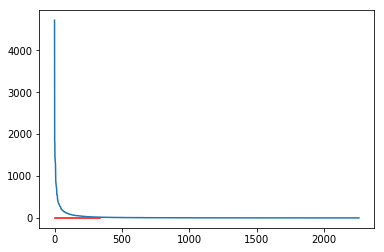

In [78]:
            
            
tc = TokenLevelCounter(list_token)
median, minority = tc.plot_token_statistics()
print(median)
print(len(minority))

False
